# This file will be used to study CKD, organized

## Prelminary installation and file info 

First we import the packages we use:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### File summary:
For the files we use, they are organized in `proj_files_csv` folder of this repository. 
proj_files_csv has 5 folders: `democsv`, `biocsv`, `albucsv`, `a1ccsv`, `FPGcsv`. Each of these has csv files corresponding to years we are interested in. 

In [2]:
years = ['9900', '0102', '0304', '0506', '0708','0910','1112','1314','1516','1720']

#### Here will be some information of what files are used for what. Note all the csv files have a SEQN column which is the identification number for each participant.

For both CKD and Diabetes:
-   `democsv`: Folder has demographics data, will use RIDAGEYR column for age and RIAGENDR column for gender 

For only CKD:
-   `biocsv` is folder with the standard biochemistry profile files. From these we use the LBXSCR column which says the serum creatinine in mg/dL
-   `albucsv` is the folder with files used for the albumin creatinine ratio. URXUMS is the urine albumin in mg/L. URXCRS is the urine creatinine in umol/L. We can divide by 1000 to get mmol/L Then we will take albumin divided by creatinine to get the ratio in (mg/mmol)

For only Diabetes:
-   `a1ccsv` is the folder with files for the a1c. DIQ010, DIQ160 columns are the participants reporting if they've been diagnosed for diabetes and prediabetes, respectively. 1 is yes, 2 is no, 3 is borderline, 7 is refused, 9 is don't know. DIQ280 is the column with the a1c value
-   `FPGcsv` is the folder with the fasting plasma glucose files. The LBXGLU column has the fasting plasma glucose measured in (mg/dL)



#### Here we'll get the demographic data since it will be used for both

In [3]:
demo_vars = []
for y in years:
    df  = pd.read_csv(f'proj_files_csv/democsv/demo{y}.csv', usecols=['SEQN', 'RIDAGEYR', 'RIAGENDR'])
    demo_vars.append(df)

#print(demo_vars)
#print(len(demo_vars))

print("The demo_vars list contains dataframes for each year. It has length: ", len(demo_vars))
print("\n The first dataframe in the list (for year 1999-2000) looks like this:") 
print(demo_vars[0].head())
print("Note RIAGENDR gender (1 male, 2 female) and RIDAGEYR is age (in years)).")
print( "\n In addition, SEQN is a unique identifier for each participant in the survey.")

The demo_vars list contains dataframes for each year. It has length:  10

 The first dataframe in the list (for year 1999-2000) looks like this:
   SEQN  RIAGENDR  RIDAGEYR
0   1.0       2.0       2.0
1   2.0       1.0      77.0
2   3.0       2.0      10.0
3   4.0       1.0       1.0
4   5.0       1.0      49.0
Note RIAGENDR gender (1 male, 2 female) and RIDAGEYR is age (in years)).

 In addition, SEQN is a unique identifier for each participant in the survey.


## CKD Data and analysis

#### We'll get the serum creatinine and urine albumin creatinine ratio data next.

This is the serum creatinine data. 

In [4]:
bio_vars = []
for y in years:
    df  = pd.read_csv(f'proj_files_csv/biocsv/bio{y}.csv', usecols=['SEQN', 'LBXSCR'])
    bio_vars.append(df)

print("\nThe bio_vars list contains dataframes for each year. It has length: ", len(bio_vars))
print("\nThe first dataframe in the list (for year 1999-2000) looks like this:")
print(bio_vars[0].head())
print("Note LBXSCR is the serum creatinine level (in mg/dL).")
print("\nIn addition, SEQN is a unique identifier for each participant in the survey.")

#print(bio_vars)
#print(len(bio_vars))


The bio_vars list contains dataframes for each year. It has length:  10

The first dataframe in the list (for year 1999-2000) looks like this:
   SEQN  LBXSCR
0   2.0     0.7
1   5.0     0.8
2   6.0     0.5
3   7.0     0.6
4   8.0     0.3
Note LBXSCR is the serum creatinine level (in mg/dL).

In addition, SEQN is a unique identifier for each participant in the survey.


Here is the albuminuria data for each year:

In [5]:
albu_vars = []
for y in years:
    df  = pd.read_csv(f'proj_files_csv/albucsv/albu{y}.csv', usecols=['SEQN', 'URXUMS','URXCRS' ])
    df['URXCRSnew'] = df['URXCRS']/1000
    df['albcretratio'] = df['URXUMS']/df['URXCRSnew']
    #df = df[['SEQN', 'albcretratio']]
    albu_vars.append(df)

print("\nThe albu_vars list contains dataframes for each year. It has length: ", len(albu_vars))
print("\nThe first dataframe in the list (for year 1999-2000) looks like this:")
print(albu_vars[0].head())
#print(albu_vars[0].columns)
print("Note URXUMS is the urine albumin level (in mg/L) and URXCRS is the urine creatinine level (in umol/L).\n URXCRSnew is the urine creatinine level converted to mmol/L.")

print("\nThe albcretratio is the albumin to creatinine ratio (in mg/mmol).")


#print(albu_vars)
#print(len(albu_vars))


The albu_vars list contains dataframes for each year. It has length:  10

The first dataframe in the list (for year 1999-2000) looks like this:
   SEQN  URXUMS   URXCRS  URXCRSnew  albcretratio
0   2.0     9.1  12818.0     12.818      0.709939
1   3.0    10.4  11138.0     11.138      0.933740
2   5.0     6.1  15205.0     15.205      0.401184
3   6.0     5.0  10962.0     10.962      0.456121
4   7.0     6.7  11315.0     11.315      0.592134
Note URXUMS is the urine albumin level (in mg/L) and URXCRS is the urine creatinine level (in umol/L).
 URXCRSnew is the urine creatinine level converted to mmol/L.

The albcretratio is the albumin to creatinine ratio (in mg/mmol).


Merging the dataframes, we will use SEQN, serum creatinine, and albumin to creatinine ratio as the main variables of interest.:

In [6]:
demobio_vars = []
for i in range(len(years)):
    demot = demo_vars[i]
    biot = bio_vars[i]
    albut = albu_vars[i]
    demobiot = pd.merge(demot,biot, on = 'SEQN')
    demobiot = pd.merge(demobiot,albut, on = 'SEQN')
    demobiot = (demobiot.dropna())
    demobiot = demobiot[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'LBXSCR', 'albcretratio']]
    demobiot = demobiot[(demobiot['RIDAGEYR'] >= 12) & (demobiot['RIDAGEYR']<85)]
    demobio_vars.append(demobiot)

print("\nThe demobio_vars list contains dataframes with serum creatinine and albu creatinine ratio for each year. It has length: ", len(demobio_vars))
print("\n Note this is ages 12 to 84 (all ages)")
print("\nThe first dataframe in the list (for year 1999-2000) looks like this:")
print(demobio_vars[0].head())


#print(len(demobio_vars))
#print(demobio_vars[3].head())
#print(demobio_vars[3].size)


The demobio_vars list contains dataframes with serum creatinine and albu creatinine ratio for each year. It has length:  10

 Note this is ages 12 to 84 (all ages)

The first dataframe in the list (for year 1999-2000) looks like this:
   SEQN  RIDAGEYR  RIAGENDR  LBXSCR  albcretratio
0   2.0      77.0       1.0     0.7      0.709939
1   5.0      49.0       1.0     0.8      0.401184
2   6.0      19.0       2.0     0.5      0.456121
3   7.0      59.0       2.0     0.6      0.592134
4   8.0      13.0       1.0     0.3      0.570307


We'll now make the following functions:
-   A function for eGFR
-   A function called eGFR_stage which says their predicted CKD stage off the eGFR and albuminuria


In [7]:
#Here is the function for eGFR (esitimated Glomerular Filtration Rate)
def eGFR(row):
    if row['RIAGENDR'] == 1:
        return 142 * min(row['LBXSCR']/0.9, 1)**(-0.302) * max(row['LBXSCR']/0.9, 1)**(-1.200) * 0.9938**row['RIDAGEYR']
    elif row['RIAGENDR'] == 2:
        return 142 * min(row['LBXSCR']/0.7, 1)**(-0.241) * max(row['LBXSCR']/0.7, 1)**(-1.200) * 0.9938**row['RIDAGEYR'] * 1.012
    
#here is a function to determine what stage it is based on https://www.kidneyfund.org/all-about-kidneys/stages-kidney-disease
def ckd_stage(row):
    if row['eGFR'] >= 60 and row['albcretratio'] < 3.4:
        return 0
    elif row['eGFR'] >= 90 and row['albcretratio'] >= 3.4:
        return 1
    elif row['eGFR'] >= 60 and row['albcretratio'] >= 3.4:
        return 2
    elif row['eGFR'] >= 30:
        return 3
    elif row['eGFR'] >= 15:
        return 4
    else:
        return 5


Applying the functions onto the dataframes:

In [8]:
for i in range(len(demobio_vars)):
    demobio_vars[i]['eGFR'] = demobio_vars[i].apply(eGFR, axis=1)
    demobio_vars[i]['ckdstage'] = demobio_vars[i].apply(ckd_stage, axis=1)
    #print(demobio_vars[i].shape)

print("\nThe first dataframe in the list (for year 1999-2000) with eGFR and CKD stage looks like this:")
print(demobio_vars[0].head())
print("\nNote eGFR is the estimated Glomerular Filtration Rate (in mL/min/1.73m^2) and ckdstage is the stage of Chronic Kidney Disease (0-5).")


The first dataframe in the list (for year 1999-2000) with eGFR and CKD stage looks like this:
   SEQN  RIDAGEYR  RIAGENDR  LBXSCR  albcretratio        eGFR  ckdstage
0   2.0      77.0       1.0     0.7      0.709939   94.901350         0
1   5.0      49.0       1.0     0.8      0.401184  108.489332         0
2   6.0      19.0       2.0     0.5      0.456121  138.473468         0
3   7.0      59.0       2.0     0.6      0.592134  103.334082         0
4   8.0      13.0       1.0     0.3      0.570307  182.501259         0

Note eGFR is the estimated Glomerular Filtration Rate (in mL/min/1.73m^2) and ckdstage is the stage of Chronic Kidney Disease (0-5).


In [9]:
print("\nThe CKD stage counts for all the years are:")
ckdvaluecounts = pd.DataFrame()
for i in range(len(demobio_vars)):
    ckdvaluecounts = pd.concat([ckdvaluecounts, demobio_vars[i]['ckdstage'].value_counts().rename(years[i])], axis=1)
    ckdvaluecounts = ckdvaluecounts.sort_index(key=lambda x: x.astype(int))
print(ckdvaluecounts)
print("\nThe CKD stage counts for all the years, the left most column is the CKD stage and the top row is the year. \n The values are the counts of participants in each CKD stage for that year.")
print("\nThe same CKD stage amounts as percentages (%) for all the years are:")

ckdvaluecounts2 = pd.DataFrame()
for i in range(len(demobio_vars)):
    ckdvaluecounts2 = pd.concat([ckdvaluecounts2, demobio_vars[i]['ckdstage'].value_counts(1).rename(years[i])], axis=1)
    ckdvaluecounts2[str(years[i])] = ((ckdvaluecounts2[str(years[i])]*100).round(2))
    ckdvaluecounts2.index = ckdvaluecounts2.index.astype(int)
    ckdvaluecounts2 = ckdvaluecounts2.sort_index()
print(ckdvaluecounts2)



The CKD stage counts for all the years are:
   9900  0102  0304  0506  0708  0910  1112  1314  1516  1720
0  5249  5716  5344  5230  5164  5764  4926  5414  5192  7719
1   542   483   371   464   449   390   418   426   405   638
2   109   166   188   175   240   206   188   207   211   333
3   117   264   284   318   359   382   327   361   319   549
4     7    23    24    23    33    29    35    31    26    51
5    12     5     3     9     7    18    17    12    12    18

The CKD stage counts for all the years, the left most column is the CKD stage and the top row is the year. 
 The values are the counts of participants in each CKD stage for that year.

The same CKD stage amounts as percentages (%) for all the years are:
    9900   0102   0304   0506   0708   0910   1112   1314   1516   1720
0  86.96  85.86  86.00  84.10  82.60  84.90  83.34  83.92  84.22  82.93
1   8.98   7.26   5.97   7.46   7.18   5.74   7.07   6.60   6.57   6.85
2   1.81   2.49   3.03   2.81   3.84   3.03   3.18

In [10]:
demobio_vars[2]['ckdstage'].value_counts()

ckdstage
0    5344
1     371
3     284
2     188
4      24
5       3
Name: count, dtype: int64

Now we will do the weighted Linear Regression and see the graphs

In [11]:
 #First we will list the years again but an average of each year pair so analysis can be done.
years2 = np.array([2000, 2002, 2004, 2006,2008,2010,2012,2014,2016,2019])

import statsmodels.api as sm

### All ages

For all ages here we will use the dataset as is without modifications

NTS: call it somethign other than demobio thats more clear its ckd stuff, maybe ckdvars or something. also i think it iwll be good to hvae three different datsets like from demobiovars. instead of all ages one say ckdallages and still define it sitll with age range limits so its clear

In [24]:
ckdstagenonzeropropsallages = np.array([])
samplesizes =np.array([])
for i in range(len(demobio_vars)):
    ckdstagenonzeropropsallages = np.append(ckdstagenonzeropropsallages,(demobio_vars[i][demobio_vars[i]['ckdstage'] >= 1].shape[0]/demobio_vars[i].shape[0]))
    samplesizes = np.append(samplesizes, (demobio_vars[i].shape[0]))
print("The proportion of people with stage ≥1 ckd for each of the years is:")
print(ckdstagenonzeropropsallages)
print("\nThe following sample sizes for each year is:")
print(samplesizes)
print("\nThe year markers for each dataset is:")
print(years2)


The proportion of people with stage ≥1 ckd for each of the years is:
[0.13038436 0.14135496 0.14000644 0.15902878 0.17402431 0.15097953
 0.16663847 0.16075027 0.15782644 0.17071336]

The following sample sizes for each year is:
[6036. 6657. 6214. 6219. 6252. 6789. 5911. 6451. 6165. 9308.]

The year markers for each dataset is:
[2000 2002 2004 2006 2008 2010 2012 2014 2016 2019]


In [ ]:
Xdemo = sm.add_constant(years2)
weightsdemo = samplesizes
modeldemo = sm.WLS(ckdstagenonzeropropsallages, Xdemo, weights=weightsdemo).fit()
print(modeldemo.summary2())
trendlinedemo = modeldemo.predict(Xdemo)

                 Results: Weighted least squares
Model:              WLS              Adj. R-squared:     0.529   
Dependent Variable: y                AIC:                -62.3078
Date:               2025-07-26 08:51 BIC:                -61.7026
No. Observations:   10               Log-Likelihood:     33.154  
Df Model:           1                F-statistic:        11.13   
Df Residuals:       8                Prob (F-statistic): 0.0103  
R-squared:          0.582            Scale:              0.63187 
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     -3.2364     1.0170   -3.1823   0.0130   -5.5816   -0.8912
x1         0.0017     0.0005    3.3355   0.0103    0.0005    0.0029
-----------------------------------------------------------------
Omnibus:               4.770       Durbin-Watson:          1.850 
Prob(Omnibus):   

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [19]:
print(f"y = {modeldemo.params[0]} + {modeldemo.params[1]}x")
 #printing p value of slope")
print(f"p-value = {modeldemo.pvalues[1]}")

y = -3.236428268867707 + 0.0016880628084033264x
p-value = 0.010299157981174624


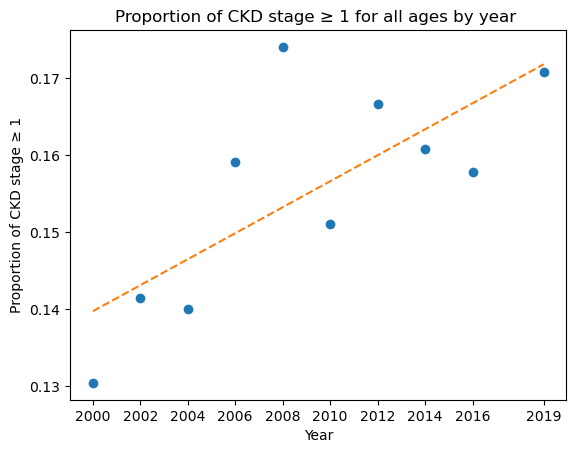

In [21]:
plt.plot(years2, ckdstagenonzeropropsallages, 'o', label='CKD stages 1-5 proportions')
plt.plot(years2, trendlinedemo, linestyle ='--', label='Trend line')
plt.xticks(years2)

plt.xlabel('Year')
plt.ylabel('Proportion of CKD stage ≥ 1')
plt.title('Proportion of CKD stage ≥ 1 for all ages by year ')

plt.show()

### Youth

For youth we will look at ages 12 to 30 inclusive, so we will filter the dataframes to only include those ages.

In [26]:
ckdstagenonzeropropsyouth = np.array([])
samplesizesyouth =np.array([])
for i in range(len(demobio_vars)):
    youth_mask = (demobio_vars[i]['RIDAGEYR'] >= 12) & (demobio_vars[i]['RIDAGEYR'] <= 30)
    all_youth = demobio_vars[i][youth_mask]
    ckdstagenonzeropropsyouth = np.append(ckdstagenonzeropropsyouth,(demobio_vars[i][(demobio_vars[i]['ckdstage'] >= 1) & youth_mask].shape[0]/all_youth.shape[0]))
    samplesizesyouth = np.append(samplesizesyouth, (all_youth.shape[0]))
print("The proportion of youth with stage ≥1 ckd for each of the years is:")
print(ckdstagenonzeropropsyouth)
print("\nThe following sample sizes for youth each year is:")
print(samplesizesyouth)
print("\nThe year markers for each dataset is:")
print(years2)


The proportion of youth with stage ≥1 ckd for each of the years is:
[0.09500693 0.09165874 0.08073458 0.10831919 0.09561543 0.08666367
 0.10127202 0.09742647 0.08423645 0.08185684]

The following sample sizes for youth each year is:
[2884. 3153. 2886. 2945. 1893. 2227. 2044. 2176. 2030. 2822.]

The year markers for each dataset is:
[2000 2002 2004 2006 2008 2010 2012 2014 2016 2019]


In [27]:
weightsdemoyouth = samplesizesyouth
modeldemoyouth = sm.WLS(ckdstagenonzeropropsyouth, Xdemo, weights=weightsdemoyouth).fit()
print(modeldemoyouth.summary2())
trendlinedemoyouth = modeldemoyouth.predict(Xdemo)

                 Results: Weighted least squares
Model:              WLS              Adj. R-squared:     -0.049  
Dependent Variable: y                AIC:                -62.9438
Date:               2025-07-26 09:18 BIC:                -62.3386
No. Observations:   10               Log-Likelihood:     33.472  
Df Model:           1                F-statistic:        0.5816  
Df Residuals:       8                Prob (F-statistic): 0.468   
R-squared:          0.068            Scale:              0.22337 
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const       0.8389     0.9791    0.8568   0.4165   -1.4189   3.0966
x1         -0.0004     0.0005   -0.7626   0.4676   -0.0015   0.0008
-----------------------------------------------------------------
Omnibus:               0.376       Durbin-Watson:          2.303 
Prob(Omnibus):   

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [28]:
print(f"y = {modeldemoyouth.params[0]} + {modeldemoyouth.params[1]}x")
 #printing p value of slope")
print(f"p-value = {modeldemoyouth.pvalues[1]}")

y = 0.8388658607631273 + -0.00037175606048751376x
p-value = 0.4675625863168271


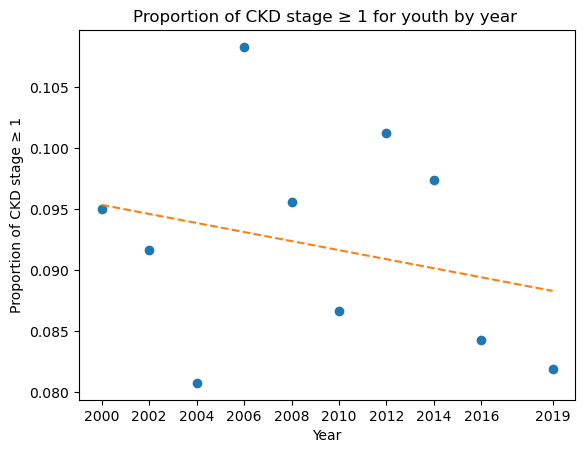

In [29]:
plt.plot(years2, ckdstagenonzeropropsyouth, 'o', label='CKD stages 1-5 proportions')
plt.plot(years2, trendlinedemoyouth, linestyle ='--', label='Trend line')
plt.xticks(years2)

plt.xlabel('Year')
plt.ylabel('Proportion of CKD stage ≥ 1')
plt.title('Proportion of CKD stage ≥ 1 for youth by year ')

plt.show()

### Middle aged


For middleage we will look at ages 31 to 59 inclusive, so we will filter the dataframes to only include those ages.

In [30]:
ckdstagenonzeropropsmiddleage = np.array([])
samplesizesmiddleage =np.array([])
for i in range(len(demobio_vars)):
    middleage_mask = (demobio_vars[i]['RIDAGEYR'] >= 31) & (demobio_vars[i]['RIDAGEYR'] <= 59)
    all_middleage = demobio_vars[i][middleage_mask]
    ckdstagenonzeropropsmiddleage = np.append(ckdstagenonzeropropsmiddleage,(demobio_vars[i][(demobio_vars[i]['ckdstage'] >= 1) & middleage_mask].shape[0]/all_middleage.shape[0]))
    samplesizesmiddleage = np.append(samplesizesmiddleage, (all_middleage.shape[0]))
print("The proportion of middleage with stage ≥1 ckd for each of the years is:")
print(ckdstagenonzeropropsmiddleage)
print("\nThe following sample sizes for middleage each year is:")
print(samplesizesmiddleage)
print("\nThe year markers for each dataset is:")
print(years2)


The proportion of middleage with stage ≥1 ckd for each of the years is:
[0.08626374 0.09486349 0.09057592 0.11242023 0.11466983 0.08164766
 0.1030711  0.10920852 0.10375454 0.11613427]

The following sample sizes for middleage each year is:
[1820. 2161. 1910. 2037. 2529. 2719. 2377. 2628. 2477. 3694.]

The year markers for each dataset is:
[2000 2002 2004 2006 2008 2010 2012 2014 2016 2019]


In [31]:
weightsdemomiddleage = samplesizesmiddleage
modeldemomiddleage = sm.WLS(ckdstagenonzeropropsmiddleage, Xdemo, weights=weightsdemomiddleage).fit()
print(modeldemomiddleage.summary2())
trendlinedemomiddleage = modeldemomiddleage.predict(Xdemo)

                 Results: Weighted least squares
Model:              WLS              Adj. R-squared:     0.226   
Dependent Variable: y                AIC:                -59.7959
Date:               2025-07-26 09:22 BIC:                -59.1908
No. Observations:   10               Log-Likelihood:     31.898  
Df Model:           1                F-statistic:        3.624   
Df Residuals:       8                Prob (F-statistic): 0.0934  
R-squared:          0.312            Scale:              0.29630 
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const      -2.1291     1.1722   -1.8162   0.1069   -4.8322   0.5741
x1          0.0011     0.0006    1.9036   0.0934   -0.0002   0.0025
-----------------------------------------------------------------
Omnibus:              2.058        Durbin-Watson:          2.387 
Prob(Omnibus):   

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [32]:
print(f"y = {modeldemomiddleage.params[0]} + {modeldemomiddleage.params[1]}x")
 #printing p value of slope")
print(f"p-value = {modeldemomiddleage.pvalues[1]}")

y = -2.1290515891393764 + 0.0011101091484770624x
p-value = 0.09344511687343027


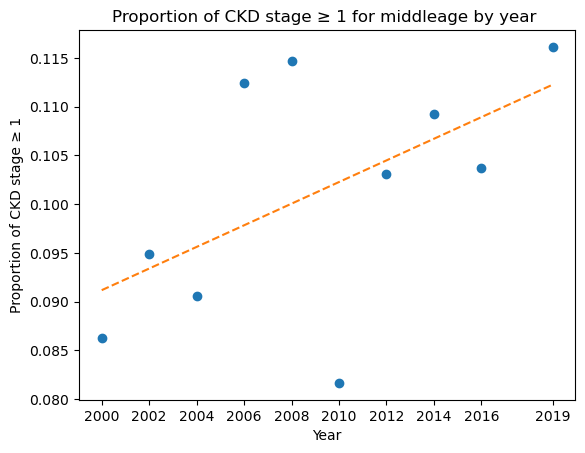

In [33]:
plt.plot(years2, ckdstagenonzeropropsmiddleage, 'o', label='CKD stages 1-5 proportions')
plt.plot(years2, trendlinedemomiddleage, linestyle ='--', label='Trend line')
plt.xticks(years2)

plt.xlabel('Year')
plt.ylabel('Proportion of CKD stage ≥ 1')
plt.title('Proportion of CKD stage ≥ 1 for middleage by year ')

plt.show()

### Elderly

For elder we will look at ages 60 to 84 inclusive, so we will filter the dataframes to only include those ages.

In [34]:
ckdstagenonzeropropselder = np.array([])
samplesizeselder =np.array([])
for i in range(len(demobio_vars)):
    elder_mask = (demobio_vars[i]['RIDAGEYR'] >= 60) & (demobio_vars[i]['RIDAGEYR'] <=84)
    all_elder = demobio_vars[i][elder_mask]
    ckdstagenonzeropropselder = np.append(ckdstagenonzeropropselder,(demobio_vars[i][(demobio_vars[i]['ckdstage'] >= 1) & elder_mask].shape[0]/all_elder.shape[0]))
    samplesizeselder = np.append(samplesizeselder, (all_elder.shape[0]))
print("The proportion of elder with stage ≥1 ckd for each of the years is:")
print(ckdstagenonzeropropselder)
print("\nThe following sample sizes for elder each year is:")
print(samplesizeselder)
print("\nThe year markers for each dataset is:")
print(years2)


The proportion of elder with stage ≥1 ckd for each of the years is:
[0.26726727 0.33283693 0.32722144 0.35650768 0.33715847 0.33098209
 0.35771812 0.32665452 0.32870929 0.33273639]

The following sample sizes for elder each year is:
[1332. 1343. 1418. 1237. 1830. 1843. 1490. 1647. 1658. 2792.]

The year markers for each dataset is:
[2000 2002 2004 2006 2008 2010 2012 2014 2016 2019]


In [35]:
weightsdemoelder = samplesizeselder
modeldemoelder = sm.WLS(ckdstagenonzeropropselder, Xdemo, weights=weightsdemoelder).fit()
print(modeldemoelder.summary2())
trendlinedemoelder = modeldemoelder.predict(Xdemo)

                 Results: Weighted least squares
Model:              WLS              Adj. R-squared:     0.028   
Dependent Variable: y                AIC:                -45.9406
Date:               2025-07-26 09:25 BIC:                -45.3354
No. Observations:   10               Log-Likelihood:     24.970  
Df Model:           1                F-statistic:        1.257   
Df Residuals:       8                Prob (F-statistic): 0.295   
R-squared:          0.136            Scale:              0.80083 
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const      -2.2424     2.2944   -0.9774   0.3570   -7.5333   3.0484
x1          0.0013     0.0011    1.1213   0.2947   -0.0014   0.0039
-----------------------------------------------------------------
Omnibus:              3.611        Durbin-Watson:          1.479 
Prob(Omnibus):   

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [36]:
print(f"y = {modeldemoelder.params[0]} + {modeldemoelder.params[1]}x")
 #printing p value of slope")
print(f"p-value = {modeldemoelder.pvalues[1]}")

y = -2.242437935626581 + 0.001279845857091763x
p-value = 0.29467605393126256


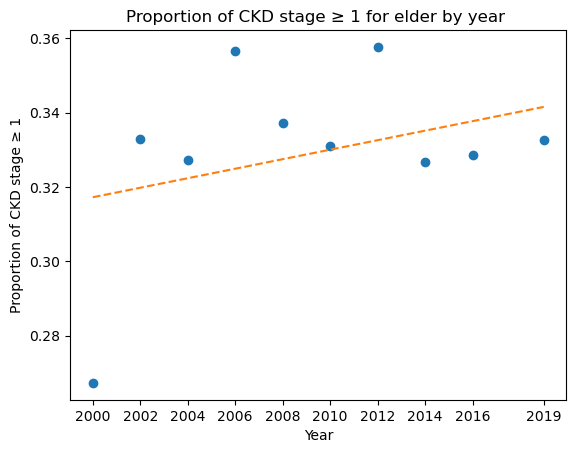

In [37]:
plt.plot(years2, ckdstagenonzeropropselder, 'o', label='CKD stages 1-5 proportions')
plt.plot(years2, trendlinedemoelder, linestyle ='--', label='Trend line')
plt.xticks(years2)

plt.xlabel('Year')
plt.ylabel('Proportion of CKD stage ≥ 1')
plt.title('Proportion of CKD stage ≥ 1 for elder by year ')

plt.show()

## Diabetes Data and Analysis

These are the a1c files, some don't have a value so for now just filling those with NaNs. I think its okay since most years have a lot of empty values, meaning we will have to rely more on plasma fasting glucose. DIQ010 is doctor told they have diabetes, 1 is yes, 2 is no, 3 borderline, 7 refused, 9 dont know. DIQ160 is ever told you have prediabetes, 1 is yes, 2 is no, others are refused, don't know, missing

In [39]:
a1c_vars = []
for y in years:
    dftem = pd.read_csv(f'proj_files_csv/a1ccsv/a1c{y}.csv')
    if 'DIQ280' in dftem.columns:
        df  = pd.read_csv(f'proj_files_csv/a1ccsv/a1c{y}.csv', usecols=['SEQN','DIQ010','DIQ160','DIQ280'])
    elif 'DIQ160' in dftem.columns:
        df = pd.read_csv(f'proj_files_csv/a1ccsv/a1c{y}.csv', usecols=['SEQN','DIQ010','DIQ160'])
        df['DIQ280'] = np.nan
    else:
        df = pd.read_csv(f'proj_files_csv/a1ccsv/a1c{y}.csv', usecols=['SEQN','DIQ010'])
        df['DIQ160'] = np.nan
        df['DIQ280'] = np.nan
    a1c_vars.append(df)

#print(a1c_vars)
print(len(a1c_vars))
print(a1c_vars[0].head())

10
   SEQN  DIQ010  DIQ160  DIQ280
0   1.0     2.0     NaN     NaN
1   2.0     2.0     NaN     NaN
2   3.0     2.0     NaN     NaN
3   4.0     2.0     NaN     NaN
4   5.0     2.0     NaN     NaN


Here is the fasting plasma glucose, measured in mg/dL

In [40]:
fpg_vars = []
for y in years:
    df  = pd.read_csv(f'proj_files_csv/FPGcsv/fpg{y}.csv', usecols=['SEQN', 'LBXGLU'])
    fpg_vars.append(df)

#print(fpg_vars)
print(len(fpg_vars))
print(fpg_vars[0].head())

10
   SEQN  LBXGLU
0   2.0    83.7
1   5.0    99.9
2   7.0    85.6
3   8.0    84.2
4  10.0    89.8


#### now to merge the a1c and fpg dataframes with the demobio_vars dataframes

Now for diabetes:: 
For diabetes we'll merge demographics, a1c, and fpg datasets. Here we'll drop the row only if there is Nans for all entries in the row. We'll first take the survey diagnosis yes for diabetes and prediabetes, and for everyone else we'll calculate a1c and fpg criteria to see if theres undiagnosed diabetes and undiagnosed prediabetes.  I think 5 categories: diabetes, prediabetes, undiagnosed diabetes, undiagnosed prediabetes, normal glycemia.

Also from that other study: "Thus, the NHANES has laboratory test results for glycated hemoglobin (A1C) and fasting plasma glucose (FPG) that could be used to determine undiagnosed diabetes (A1C ≥6.5% [≥48 mmol/mol] or FPG ≥126 mg/dL [≥6.99 mmol/L; fast 8–<24 hours] and no self-report of diagnosed diabetes) and prediabetes (A1C 5.7%–<6.5% [39–<48 mmol/mol] or FPG 100–<126 mg/dL [5.55–<6.99 mmol/L; fast 8–<24 hours])."


In [41]:
demoa1cfpg_vars = []
for i in range(len(years)):
    demot = demo_vars[i]
    a1ct = a1c_vars[i]
    fpgt = fpg_vars[i]
    demoa1cfpgt = pd.merge(demot,a1ct, on = 'SEQN')
    demoa1cfpgt = pd.merge(demoa1cfpgt,fpgt, on = 'SEQN')
    demoa1cfpgt = demoa1cfpgt.loc[~demoa1cfpgt.drop(columns=['SEQN']).isna().all(axis=1)]
    demoa1cfpgt = demoa1cfpgt[(demoa1cfpgt['RIDAGEYR'] >= 12) & (demoa1cfpgt['RIDAGEYR']< 85)]
    demoa1cfpg_vars.append(demoa1cfpgt)
print(len(demoa1cfpg_vars))
print(demoa1cfpg_vars[0].shape)
print(demoa1cfpg_vars[0].head())

10
(3212, 7)
   SEQN  RIAGENDR  RIDAGEYR  DIQ010  DIQ160  DIQ280  LBXGLU
0   2.0       1.0      77.0     2.0     NaN     NaN    83.7
1   5.0       1.0      49.0     2.0     NaN     NaN    99.9
2   7.0       2.0      59.0     2.0     NaN     NaN    85.6
3   8.0       1.0      13.0     2.0     NaN     NaN    84.2
4  10.0       1.0      43.0     2.0     NaN     NaN    89.8


DIQ010 is doctor told they have diabetes, 1 is yes, 2 is no, 3 borderline, 7 refused, 9 dont know. DIQ160 is ever told you have prediabetes, 1 is yes, 2 is no, others are refused, don't know, missing

In [44]:
#Here is a function to get diabetes column
def diabetes(row):
    if pd.notna(row['DIQ010']) and int(row['DIQ010']) == 1:
        return 1
    else:
        return 0

#here is prediabetes column function
def prediabetes(row):
    if pd.notna(row['DIQ160']) and int(row['DIQ160']) == 1:
        return 1
    else:
        return 0

#Here is function for undiagnosed diabetes
def undiagdiab(row):
    if row['diabetes'] == 0 and row['prediabetes'] == 0:
        if (pd.notna(row['DIQ280']) and row['DIQ280'] >= 6.5):
            return 1
        elif (pd.notna(row['LBXGLU']) and row['LBXGLU'] > 137):
            return 1
        else:
            return 0
    return 0

def undiagpred(row):
    if row['diabetes'] == 0 and row['prediabetes'] == 0 and row['undiagdiab'] ==0:
        if (pd.notna(row['DIQ280']) and row['DIQ280'] >= 5.7 and row['DIQ280'] < 6.5):
            return 1
        elif (pd.notna(row['LBXGLU']) and row['LBXGLU'] >= 117 and row['LBXGLU'] <= 137):
            return 1
        else:
            return 0
    return 0

In [45]:
for i in range(len(demoa1cfpg_vars)):
    demoa1cfpg_vars[i]['diabetes'] = demoa1cfpg_vars[i].apply(diabetes, axis=1)
    demoa1cfpg_vars[i]['prediabetes'] = demoa1cfpg_vars[i].apply(prediabetes, axis=1)
print(demoa1cfpg_vars[0].head(5))

   SEQN  RIAGENDR  RIDAGEYR  DIQ010  DIQ160  DIQ280  LBXGLU  diabetes  \
0   2.0       1.0      77.0     2.0     NaN     NaN    83.7         0   
1   5.0       1.0      49.0     2.0     NaN     NaN    99.9         0   
2   7.0       2.0      59.0     2.0     NaN     NaN    85.6         0   
3   8.0       1.0      13.0     2.0     NaN     NaN    84.2         0   
4  10.0       1.0      43.0     2.0     NaN     NaN    89.8         0   

   prediabetes  
0            0  
1            0  
2            0  
3            0  
4            0  


In [46]:

for i in range(len(demoa1cfpg_vars)):
    demoa1cfpg_vars[i]['undiagdiab'] = demoa1cfpg_vars[i].apply(undiagdiab, axis=1)

for i in range(len(demoa1cfpg_vars)):
    demoa1cfpg_vars[i]['undiagpred'] = demoa1cfpg_vars[i].apply(undiagpred, axis=1)

print(demoa1cfpg_vars[0].shape)
print(demoa1cfpg_vars[0].head(5))

(3212, 11)
   SEQN  RIAGENDR  RIDAGEYR  DIQ010  DIQ160  DIQ280  LBXGLU  diabetes  \
0   2.0       1.0      77.0     2.0     NaN     NaN    83.7         0   
1   5.0       1.0      49.0     2.0     NaN     NaN    99.9         0   
2   7.0       2.0      59.0     2.0     NaN     NaN    85.6         0   
3   8.0       1.0      13.0     2.0     NaN     NaN    84.2         0   
4  10.0       1.0      43.0     2.0     NaN     NaN    89.8         0   

   prediabetes  undiagdiab  undiagpred  
0            0           0           0  
1            0           0           0  
2            0           0           0  
3            0           0           0  
4            0           0           0  


In [54]:
#this both is a check to make sure no two columns are 1 at the same time and to get an idea of how many nonzero values there are
#df2 = pd.DataFrame()
for i in range(len(demoa1cfpg_vars)):
    #demoa1cfpg_vars[i]['col2'] = demoa1cfpg_vars[i]['diabetes']+demoa1cfpg_vars[i]['prediabetes']
    #demoa1cfpg_vars[i]['col2'] = demoa1cfpg_vars[i]['diabetes']+demoa1cfpg_vars[i]['prediabetes']+demoa1cfpg_vars[i]['undiagdiab']
    demoa1cfpg_vars[i]['col2'] = demoa1cfpg_vars[i]['diabetes']+demoa1cfpg_vars[i]['prediabetes']+demoa1cfpg_vars[i]['undiagdiab'] +demoa1cfpg_vars[i]['undiagpred']
    #print(df2['col2'].value_counts())
    #print(demoa1cfpg_vars[i]['col2'].value_counts(1.0))
    #print(df2['col2'].size)

### All ages

In [57]:
diabpropsnonzeroallages = np.array([])
weightsdiaballages = np.array([])
for i in range(len(demoa1cfpg_vars)):
    diabpropsnonzeroallages = np.append(diabpropsnonzeroallages,demoa1cfpg_vars[i]['col2'].value_counts(normalize=True).get(1,0))
    weightsdiaballages = np.append(weightsdiaballages, (demoa1cfpg_vars[i].shape[0]))
print(diabpropsnonzeroallages)
print(years2)
print(weightsdiaballages)
Xdiab = sm.add_constant(years2)
print(Xdiab)
    #print(demoa1cfpg_vars[i].shape[0])
    #print(demoa1cfpg_vars[i][demoa1cfpg_vars[i]['col2'] >= 1].shape[0])

[0.0996264  0.10856824 0.11530205 0.14072495 0.22352941 0.19771014
 0.2012967  0.19074797 0.26637418 0.28939096]
[2000 2002 2004 2006 2008 2010 2012 2014 2016 2019]
[3212. 3583. 3261. 3283. 3315. 3581. 3239. 3329. 3191. 5090.]
[[1.000e+00 2.000e+03]
 [1.000e+00 2.002e+03]
 [1.000e+00 2.004e+03]
 [1.000e+00 2.006e+03]
 [1.000e+00 2.008e+03]
 [1.000e+00 2.010e+03]
 [1.000e+00 2.012e+03]
 [1.000e+00 2.014e+03]
 [1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]]


In [58]:
modeldiaballages = sm.WLS(diabpropsnonzeroallages, Xdiab, weights=weightsdiaballages).fit()
#modeldiab = sm.OLS(diabpropsnonzero, Xdiab).fit()
print(modeldiaballages.summary2())
trendlinediaballages = modeldiaballages.predict(Xdiab)

                 Results: Weighted least squares
Model:              WLS              Adj. R-squared:     0.869   
Dependent Variable: y                AIC:                -43.5949
Date:               2025-07-26 09:39 BIC:                -42.9897
No. Observations:   10               Log-Likelihood:     23.797  
Df Model:           1                F-statistic:        60.52   
Df Residuals:       8                Prob (F-statistic): 5.34e-05
R-squared:          0.883            Scale:              2.1790  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      -19.8951    2.5816  -7.7065  0.0001  -25.8483  -13.9419
x1           0.0100    0.0013   7.7794  0.0001    0.0070    0.0130
-----------------------------------------------------------------
Omnibus:               2.779       Durbin-Watson:          2.027 
Prob(Omnibus):        

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [59]:
print(f"y = {modeldiaballages.params[0]} + {modeldiaballages.params[1]}x")
 #printing p value of slope")
print(f"p-value = {modeldiaballages.pvalues[1]}")

y = -19.89510929984839 + 0.009993918522372488x
p-value = 5.3372644903549776e-05


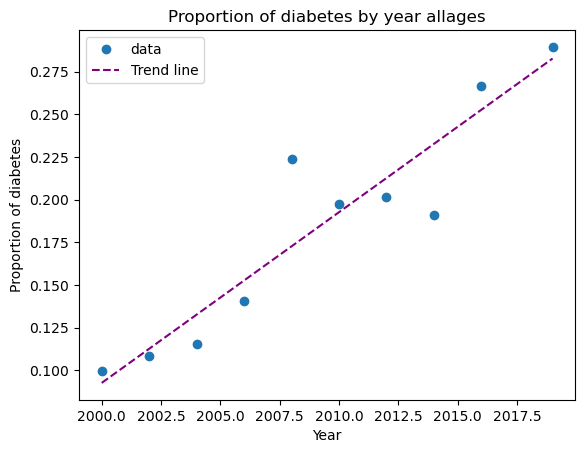

In [60]:
plt.plot(years2, diabpropsnonzeroallages, 'o', label='data')
plt.plot(years2, trendlinediaballages, linestyle ='--',color = 'purple' ,label='Trend line')
plt.xlabel('Year')
plt.ylabel('Proportion of diabetes')
plt.title('Proportion of diabetes by year allages')
plt.legend()
plt.show()

### Youth

We look at ages 12 to 30 inclusive:

In [66]:
diabpropsnonzeroyouth = np.array([])
weightsdiabyouth = np.array([])
for i in range(len(demoa1cfpg_vars)):
    youth_mask = (demoa1cfpg_vars[i]['RIDAGEYR'] >= 12) & (demoa1cfpg_vars[i]['RIDAGEYR'] <=30)
    all_youth = demoa1cfpg_vars[i][youth_mask]
    diabpropsnonzeroyouth = np.append(diabpropsnonzeroyouth,demoa1cfpg_vars[i][youth_mask]['col2'].value_counts(normalize=True).get(1,0))
    weightsdiabyouth = np.append(weightsdiabyouth, (all_youth.shape[0]))
print(diabpropsnonzeroyouth)
print(years2)
print(weightsdiabyouth)
Xdiab = sm.add_constant(years2)
print(Xdiab)
    #print(demoa1cfpg_vars[i].shape[0])
    #print(demoa1cfpg_vars[i][demoa1cfpg_vars[i]['col2'] >= 1].shape[0])

[0.00867824 0.01665675 0.01170351 0.02454374 0.04369919 0.03849372
 0.0340197  0.02862254 0.05043647 0.0681074 ]
[2000 2002 2004 2006 2008 2010 2012 2014 2016 2019]
[1498. 1681. 1538. 1589.  984. 1195. 1117. 1118. 1031. 1527.]
[[1.000e+00 2.000e+03]
 [1.000e+00 2.002e+03]
 [1.000e+00 2.004e+03]
 [1.000e+00 2.006e+03]
 [1.000e+00 2.008e+03]
 [1.000e+00 2.010e+03]
 [1.000e+00 2.012e+03]
 [1.000e+00 2.014e+03]
 [1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]]


In [67]:
modeldiabyouth = sm.WLS(diabpropsnonzeroyouth, Xdiab, weights=weightsdiabyouth).fit()
#modeldiab = sm.OLS(diabpropsnonzero, Xdiab).fit()
print(modeldiabyouth.summary2())
trendlinediabyouth = modeldiabyouth.predict(Xdiab)

                 Results: Weighted least squares
Model:              WLS              Adj. R-squared:     0.798   
Dependent Variable: y                AIC:                -64.6034
Date:               2025-07-26 09:53 BIC:                -63.9983
No. Observations:   10               Log-Likelihood:     34.302  
Df Model:           1                F-statistic:        36.62   
Df Residuals:       8                Prob (F-statistic): 0.000305
R-squared:          0.821            Scale:              0.10008 
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     -5.4226     0.9012   -6.0168   0.0003   -7.5008   -3.3443
x1         0.0027     0.0004    6.0514   0.0003    0.0017    0.0037
-----------------------------------------------------------------
Omnibus:              0.729        Durbin-Watson:          1.539 
Prob(Omnibus):   

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [68]:
print(f"y = {modeldiabyouth.params[0]} + {modeldiabyouth.params[1]}x")
 #printing p value of slope")
print(f"p-value = {modeldiabyouth.pvalues[1]}")

y = -5.422565728980299 + 0.002715236665096219x
p-value = 0.0003054460370322375


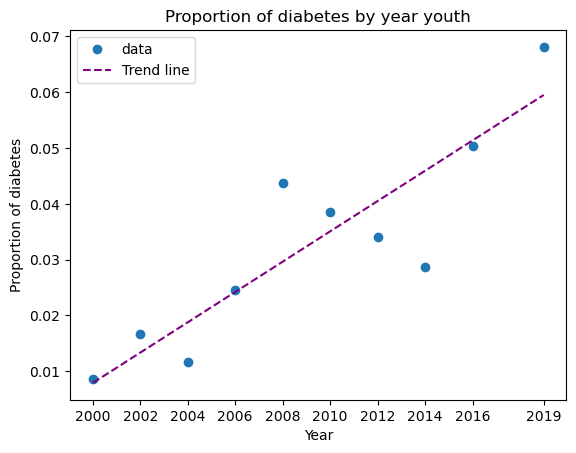

In [69]:
plt.plot(years2, diabpropsnonzeroyouth, 'o', label='data')
plt.plot(years2, trendlinediabyouth, linestyle ='--',color = 'purple' ,label='Trend line')
plt.xticks(years2)
plt.xlabel('Year')
plt.ylabel('Proportion of diabetes')
plt.title('Proportion of diabetes by year youth')
plt.legend()
plt.show()

### Middle aged


We look at ages 31 to 59 inclusive:

In [70]:
diabpropsnonzeromiddleage = np.array([])
weightsdiabmiddleage = np.array([])
for i in range(len(demoa1cfpg_vars)):
    middleage_mask = (demoa1cfpg_vars[i]['RIDAGEYR'] >= 31) & (demoa1cfpg_vars[i]['RIDAGEYR'] <=59)
    all_middleage = demoa1cfpg_vars[i][middleage_mask]
    diabpropsnonzeromiddleage = np.append(diabpropsnonzeromiddleage,demoa1cfpg_vars[i][middleage_mask]['col2'].value_counts(normalize=True).get(1,0))
    weightsdiabmiddleage = np.append(weightsdiabmiddleage, (all_middleage.shape[0]))
print(diabpropsnonzeromiddleage)
print(years2)
print(weightsdiabmiddleage)
Xdiab = sm.add_constant(years2)
print(Xdiab)
    #print(demoa1cfpg_vars[i].shape[0])
    #print(demoa1cfpg_vars[i][demoa1cfpg_vars[i]['col2'] >= 1].shape[0])

[0.09803922 0.11688312 0.12162162 0.16380952 0.20684411 0.18683652
 0.21090047 0.19490255 0.28628389 0.28921079]
[2000 2002 2004 2006 2008 2010 2012 2014 2016 2019]
[ 969. 1155.  962. 1050. 1315. 1413. 1266. 1334. 1254. 2002.]
[[1.000e+00 2.000e+03]
 [1.000e+00 2.002e+03]
 [1.000e+00 2.004e+03]
 [1.000e+00 2.006e+03]
 [1.000e+00 2.008e+03]
 [1.000e+00 2.010e+03]
 [1.000e+00 2.012e+03]
 [1.000e+00 2.014e+03]
 [1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]]


In [71]:
modeldiabmiddleage = sm.WLS(diabpropsnonzeromiddleage, Xdiab, weights=weightsdiabmiddleage).fit()
#modeldiab = sm.OLS(diabpropsnonzero, Xdiab).fit()
print(modeldiabmiddleage.summary2())
trendlinediabmiddleage = modeldiabmiddleage.predict(Xdiab)

                 Results: Weighted least squares
Model:              WLS              Adj. R-squared:     0.888   
Dependent Variable: y                AIC:                -45.6405
Date:               2025-07-26 09:55 BIC:                -45.0353
No. Observations:   10               Log-Likelihood:     24.820  
Df Model:           1                F-statistic:        72.26   
Df Residuals:       8                Prob (F-statistic): 2.81e-05
R-squared:          0.900            Scale:              0.63613 
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      -19.8748    2.3614  -8.4164  0.0000  -25.3203  -14.4293
x1           0.0100    0.0012   8.5003  0.0000    0.0073    0.0127
-----------------------------------------------------------------
Omnibus:              1.329        Durbin-Watson:          2.528 
Prob(Omnibus):        

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [72]:
print(f"y = {modeldiabmiddleage.params[0]} + {modeldiabmiddleage.params[1]}x")
 #printing p value of slope")
print(f"p-value = {modeldiabmiddleage.pvalues[1]}")

y = -19.874825982622742 + 0.009985803418447904x
p-value = 2.8145333562557115e-05


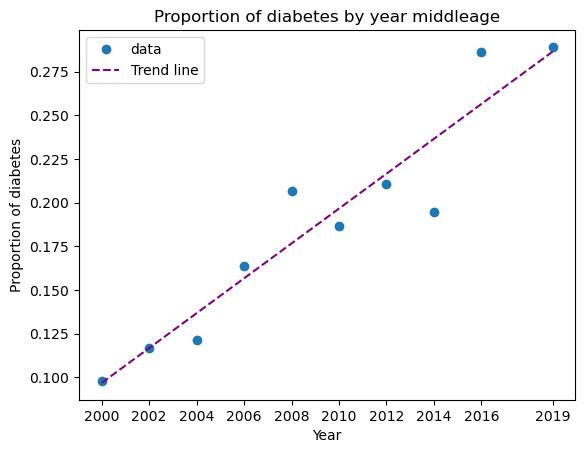

In [73]:
plt.plot(years2, diabpropsnonzeromiddleage, 'o', label='data')
plt.plot(years2, trendlinediabmiddleage, linestyle ='--',color = 'purple' ,label='Trend line')
plt.xticks(years2)
plt.xlabel('Year')
plt.ylabel('Proportion of diabetes')
plt.title('Proportion of diabetes by year middleage')
plt.legend()
plt.show()

### Elderly

In [74]:
We look at elder, ages 60 to 84 inclusive

SyntaxError: invalid syntax (2409914811.py, line 1)

In [75]:
diabpropsnonzeroelder = np.array([])
weightsdiabelder = np.array([])
for i in range(len(demoa1cfpg_vars)):
    elder_mask = (demoa1cfpg_vars[i]['RIDAGEYR'] >= 60) & (demoa1cfpg_vars[i]['RIDAGEYR'] <=84)
    all_elder = demoa1cfpg_vars[i][elder_mask]
    diabpropsnonzeroelder = np.append(diabpropsnonzeroelder,demoa1cfpg_vars[i][elder_mask]['col2'].value_counts(normalize=True).get(1,0))
    weightsdiabelder = np.append(weightsdiabelder, (all_elder.shape[0]))
print(diabpropsnonzeroelder)
print(years2)
print(weightsdiabelder)
Xdiab = sm.add_constant(years2)
print(Xdiab)
    #print(demoa1cfpg_vars[i].shape[0])
    #print(demoa1cfpg_vars[i][demoa1cfpg_vars[i]['col2'] >= 1].shape[0])

[0.28456376 0.30254351 0.31668857 0.38975155 0.41929134 0.40904419
 0.40537383 0.39110604 0.48454746 0.50608584]
[2000 2002 2004 2006 2008 2010 2012 2014 2016 2019]
[ 745.  747.  761.  644. 1016.  973.  856.  877.  906. 1561.]
[[1.000e+00 2.000e+03]
 [1.000e+00 2.002e+03]
 [1.000e+00 2.004e+03]
 [1.000e+00 2.006e+03]
 [1.000e+00 2.008e+03]
 [1.000e+00 2.010e+03]
 [1.000e+00 2.012e+03]
 [1.000e+00 2.014e+03]
 [1.000e+00 2.016e+03]
 [1.000e+00 2.019e+03]]


In [76]:
modeldiabelder = sm.WLS(diabpropsnonzeroelder, Xdiab, weights=weightsdiabelder).fit()
#modeldiab = sm.OLS(diabpropsnonzero, Xdiab).fit()
print(modeldiabelder.summary2())
trendlinediabelder = modeldiabelder.predict(Xdiab)

                 Results: Weighted least squares
Model:              WLS              Adj. R-squared:     0.858   
Dependent Variable: y                AIC:                -40.6972
Date:               2025-07-26 09:56 BIC:                -40.0920
No. Observations:   10               Log-Likelihood:     22.349  
Df Model:           1                F-statistic:        55.29   
Df Residuals:       8                Prob (F-statistic): 7.36e-05
R-squared:          0.874            Scale:              0.73950 
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      -21.6373    2.9643  -7.2994  0.0001  -28.4729  -14.8017
x1           0.0110    0.0015   7.4358  0.0001    0.0076    0.0144
-----------------------------------------------------------------
Omnibus:              0.818        Durbin-Watson:          1.600 
Prob(Omnibus):        

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [77]:
print(f"y = {modeldiabelder.params[0]} + {modeldiabelder.params[1]}x")
 #printing p value of slope")
print(f"p-value = {modeldiabelder.pvalues[1]}")

y = -21.63729293011313 + 0.010964677105212508x
p-value = 7.363276213322716e-05


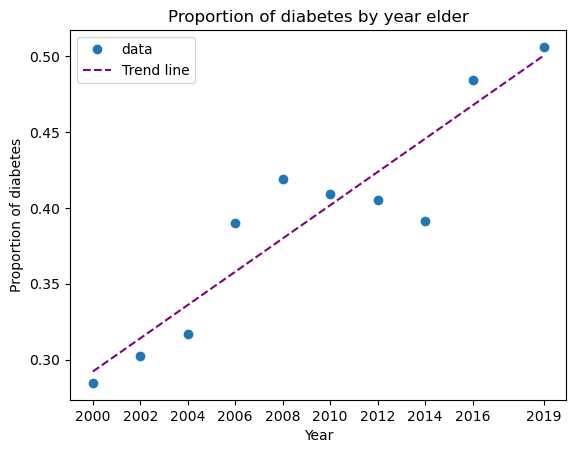

In [78]:
plt.plot(years2, diabpropsnonzeroelder, 'o', label='data')
plt.plot(years2, trendlinediabelder, linestyle ='--',color = 'purple' ,label='Trend line')
plt.xticks(years2)
plt.xlabel('Year')
plt.ylabel('Proportion of diabetes')
plt.title('Proportion of diabetes by year elder')
plt.legend()
plt.show()

## Association between CKD and diabetes

the association will be shown for all ages

In [82]:
print(ckdstagenonzeropropsallages)

print(diabpropsnonzeroallages)

[0.13038436 0.14135496 0.14000644 0.15902878 0.17402431 0.15097953
 0.16663847 0.16075027 0.15782644 0.17071336]
[0.00867824 0.01665675 0.01170351 0.02454374 0.04369919 0.03849372
 0.0340197  0.02862254 0.05043647 0.0681074 ]


In [83]:
from sklearn.linear_model import LinearRegression

X3 = diabpropsnonzeroallages.reshape(-1, 1)
y3 = ckdstagenonzeropropsallages

reg3 = LinearRegression().fit(X3, y3)
print("Slope:", reg3.coef_[0])
print("Intercept:", reg3.intercept_)

#plt.scatter(X3, y3)
#plt.plot(X3, reg3.predict(X3), color='red', linewidth=2)
#plt.show()

Slope: 0.6088719777721674
Intercept: 0.13538471272111013


In [84]:
X3c = sm.add_constant(np.array(diabpropsnonzeroallages))
model3 = sm.OLS( np.array(y3),X3c).fit()
print(model3.summary())
trendline3 = model3.predict(X3c)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     13.22
Date:                Sat, 26 Jul 2025   Prob (F-statistic):            0.00663
Time:                        10:01:04   Log-Likelihood:                 33.706
No. Observations:                  10   AIC:                            -63.41
Df Residuals:                       8   BIC:                            -62.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1354      0.006     21.888      0.0

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [85]:
print(f"y = {model3.params[0]} + {model3.params[1]}x")
 #printing p value of slope")
print(f"p-value = {model3.pvalues[1]}")
 #print R^2
print(f"R^2 = {model3.rsquared}")

y = 0.13538471272111005 + 0.608871977772169x
p-value = 0.006628656382443377
R^2 = 0.622986560532802


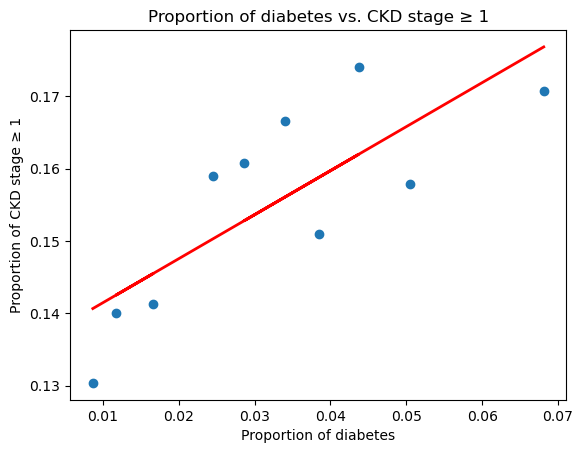

In [87]:
plt.scatter(X3, y3)
plt.plot(diabpropsnonzeroallages, trendline3, color='red', linewidth=2, label='Trend line')
plt.xlabel('Proportion of diabetes')
plt.ylabel('Proportion of CKD stage ≥ 1')
plt.title('Proportion of diabetes vs. CKD stage ≥ 1')
plt.show()